# Evolving Network of Chain Letters

In [1]:
%matplotlib inline

In [2]:
import os
import glob

import numpy as np
import pandas as pd
import powerlaw as pl
import seaborn as sns
import textnet as tn

from sklearn.feature_extraction.text import TfidfVectorizer

from exp_utils import load_letters

In [3]:
sns.set_style("whitegrid")
flatui = ["#e74c3c", "#34495e", "#3498db", "#9b59b6", "#95a5a6", "#2ecc71"]
sns.set_palette(sns.color_palette(flatui))

In [4]:
letter_files, letter_dates = load_letters("/Users/folgert/roodkapje/chain-letters/luck/")

## Vector Space Models

In [5]:
vec_char_idf = TfidfVectorizer(input='filename', use_idf=True, analyzer='char', ngram_range=(4, 4))
X_char_idf = vec_char_idf.fit_transform(letter_files)
X_char_idf.shape

(554, 27102)

In [6]:
vec_char_tf = TfidfVectorizer(input='filename', use_idf=False, analyzer='char', ngram_range=(4, 4))
X_char_tf = vec_char_tf.fit_transform(letter_files)
X_char_tf.shape

(554, 27102)

In [7]:
vec_word_idf = TfidfVectorizer(input='filename', use_idf=True, analyzer='word', ngram_range=(1, 1))
X_word_idf = vec_word_idf.fit_transform(letter_files)
X_word_idf.shape

(554, 4569)

In [8]:
vec_word_tf = TfidfVectorizer(input='filename', use_idf=False, analyzer='word', ngram_range=(1, 1))
X_word_tf = vec_word_tf.fit_transform(letter_files)
X_word_tf.shape

(554, 4569)

## Clustering

In [9]:
Y_char_idf = tn.bootstrap_neighbors(X_char_idf, time_index=letter_dates, n_iter=1000, seed=1)
Y_char_tf = tn.bootstrap_neighbors(X_char_tf, time_index=letter_dates, n_iter=1000, seed=1)
Y_word_idf = tn.bootstrap_neighbors(X_word_idf, time_index=letter_dates, n_iter=1000, seed=1)
Y_word_tf = tn.bootstrap_neighbors(X_word_tf, time_index=letter_dates, n_iter=1000, seed=1)

0%                          100%
[##############################] | ETA[sec]: 0.000 
Total time elapsed: 124.905 sec
0%                          100%
[##############################] | ETA[sec]: 0.000 
Total time elapsed: 130.500 sec
0%                          100%
[##############################] | ETA[sec]: 0.000 
Total time elapsed: 28.778 sec
0%                          100%
[##############################] | ETA[sec]: 0.000 
Total time elapsed: 31.229 sec


In [10]:
Y_char_idf_m = tn.bootstrap_neighbors(X_char_idf, time_index=letter_dates, n_iter=1000, seed=1, tol=0.001, all_min=True)
Y_char_tf_m = tn.bootstrap_neighbors(X_char_tf, time_index=letter_dates, n_iter=1000, seed=1, tol=0.001, all_min=True)
Y_word_idf_m = tn.bootstrap_neighbors(X_word_idf, time_index=letter_dates, n_iter=1000, seed=1, tol=0.001, all_min=True)
Y_word_tf_m = tn.bootstrap_neighbors(X_word_tf, time_index=letter_dates, n_iter=1000, seed=1, tol=0.001, all_min=True)

0%                          100%
[##############################] | ETA[sec]: 0.000 
Total time elapsed: 129.309 sec
0%                          100%
[##############################] | ETA[sec]: 0.000 
Total time elapsed: 132.728 sec
0%                          100%
[##############################] | ETA[sec]: 0.000 
Total time elapsed: 31.830 sec
0%                          100%
[##############################] | ETA[sec]: 0.000 
Total time elapsed: 34.719 sec


## Analysis

### Sigma Evaluation

In [11]:
S_char_idf = tn.statistics.eval_sigmas(Y_char_idf, letter_dates)
S_char_tf = tn.statistics.eval_sigmas(Y_char_tf, letter_dates)
S_word_idf = tn.statistics.eval_sigmas(Y_word_idf, letter_dates)
S_word_tf = tn.statistics.eval_sigmas(Y_word_tf, letter_dates)

S_char_idf_m = tn.statistics.eval_sigmas(Y_char_idf_m, letter_dates)
S_char_tf_m = tn.statistics.eval_sigmas(Y_char_tf_m, letter_dates)
S_word_idf_m = tn.statistics.eval_sigmas(Y_word_idf_m, letter_dates)
S_word_tf_m = tn.statistics.eval_sigmas(Y_word_tf_m, letter_dates)

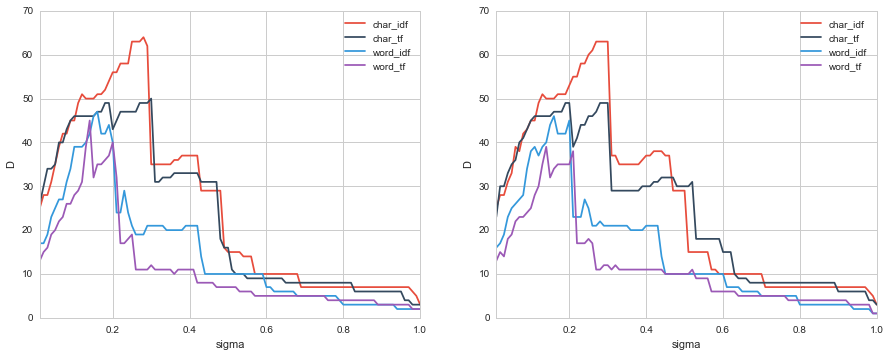

In [12]:
fig, (ax1, ax2) = sns.plt.subplots(ncols=2)

S_char_idf.D.plot(label="char_idf", ax=ax1)
S_char_tf.D.plot(label="char_tf", ax=ax1)
S_word_idf.D.plot(label="word_idf", ax=ax1)
S_word_tf.D.plot(label="word_tf", ax=ax1)
ax1.legend()
ax1.set_ylabel("D")

S_char_idf_m.D.plot(label="char_idf", ax=ax2)
S_char_tf_m.D.plot(label="char_tf", ax=ax2)
S_word_idf_m.D.plot(label="word_idf", ax=ax2)
S_word_tf_m.D.plot(label="word_tf", ax=ax2)
ax2.legend()
ax2.set_ylabel("D")

fig.set_figwidth(15)

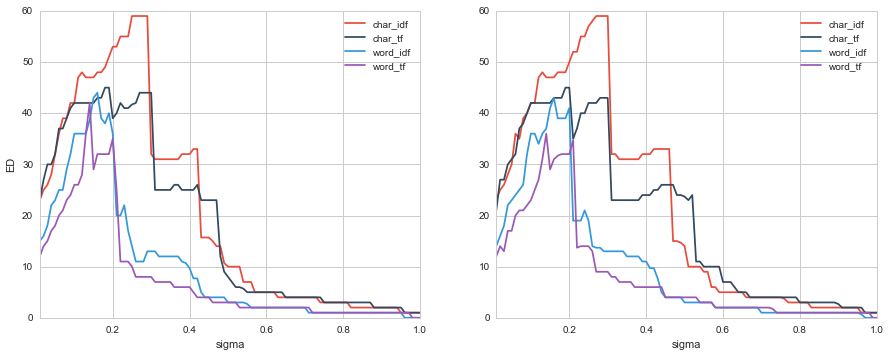

In [13]:
fig, (ax1, ax2) = sns.plt.subplots(ncols=2)

S_char_idf.ED.plot(label="char_idf", ax=ax1)
S_char_tf.ED.plot(label="char_tf", ax=ax1)
S_word_idf.ED.plot(label="word_idf", ax=ax1)
S_word_tf.ED.plot(label="word_tf", ax=ax1)
ax1.legend()
ax1.set_ylabel("ED")

S_char_idf_m.ED.plot(label="char_idf", ax=ax2)
S_char_tf_m.ED.plot(label="char_tf", ax=ax2)
S_word_idf_m.ED.plot(label="word_idf", ax=ax2)
S_word_tf_m.ED.plot(label="word_tf", ax=ax2)
ax2.legend()
ax1.set_ylabel("ED")

fig.set_figwidth(15)

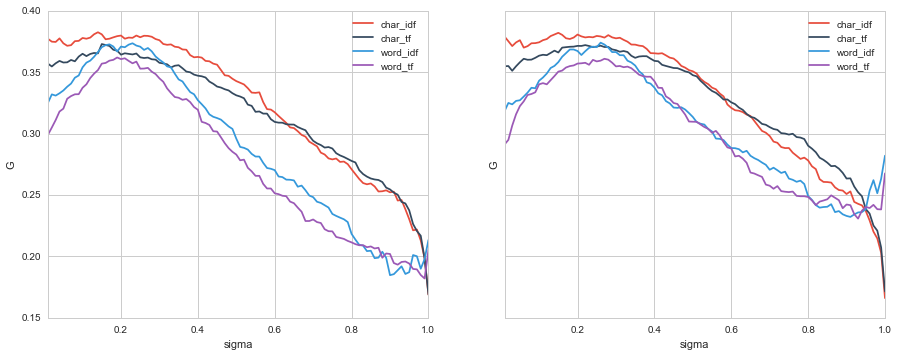

In [14]:
fig, (ax1, ax2) = sns.plt.subplots(ncols=2, sharey=True)

S_char_idf.gini_d.plot(label="char_idf", ax=ax1)
S_char_tf.gini_d.plot(label="char_tf", ax=ax1)
S_word_idf.gini_d.plot(label="word_idf", ax=ax1)
S_word_tf.gini_d.plot(label="word_tf", ax=ax1)
ax1.legend()
ax1.set_ylabel("G")

S_char_idf_m.gini_d.plot(label="char_idf", ax=ax2)
S_char_tf_m.gini_d.plot(label="char_tf", ax=ax2)
S_word_idf_m.gini_d.plot(label="word_idf", ax=ax2)
S_word_tf_m.gini_d.plot(label="word_tf", ax=ax2)
ax2.legend()
ax2.set_ylabel("G")

fig.set_figwidth(15)

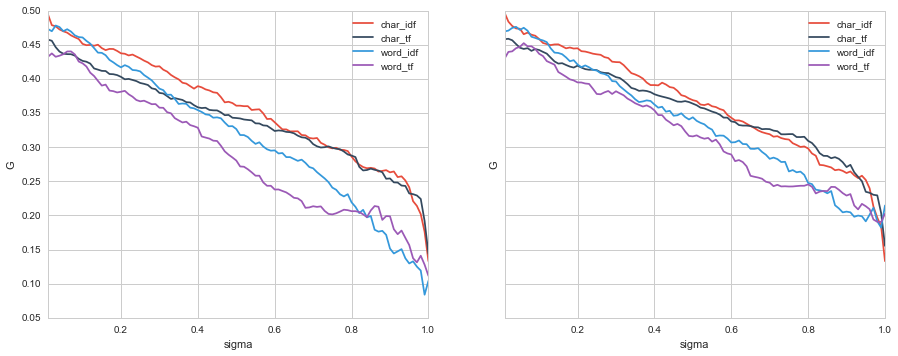

In [15]:
fig, (ax1, ax2) = sns.plt.subplots(ncols=2, sharey=True)

S_char_idf.gini_d_in.plot(label="char_idf", ax=ax1)
S_char_tf.gini_d_in.plot(label="char_tf", ax=ax1)
S_word_idf.gini_d_in.plot(label="word_idf", ax=ax1)
S_word_tf.gini_d_in.plot(label="word_tf", ax=ax1)
ax1.legend()
ax1.set_ylabel("G")

S_char_idf_m.gini_d_in.plot(label="char_idf", ax=ax2)
S_char_tf_m.gini_d_in.plot(label="char_tf", ax=ax2)
S_word_idf_m.gini_d_in.plot(label="word_idf", ax=ax2)
S_word_tf_m.gini_d_in.plot(label="word_tf", ax=ax2)
ax2.legend()
ax2.set_ylabel("G")

fig.set_figwidth(15)

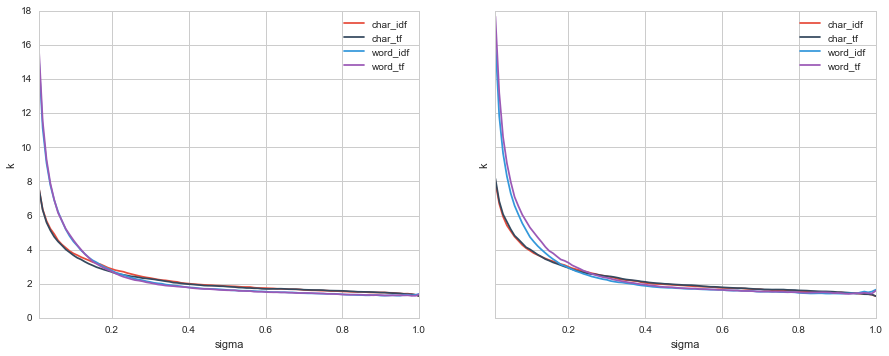

In [16]:
fig, (ax1, ax2) = sns.plt.subplots(ncols=2, sharey=True)

S_char_idf.k.plot(label="char_idf", ax=ax1)
S_char_tf.k.plot(label="char_tf", ax=ax1)
S_word_idf.k.plot(label="word_idf", ax=ax1)
S_word_tf.k.plot(label="word_tf", ax=ax1)
ax1.legend()
ax1.set_ylabel("k")

S_char_idf_m.k.plot(label="char_idf", ax=ax2)
S_char_tf_m.k.plot(label="char_tf", ax=ax2)
S_word_idf_m.k.plot(label="word_idf", ax=ax2)
S_word_tf_m.k.plot(label="word_tf", ax=ax2)
ax2.legend()
ax2.set_ylabel("k")

fig.set_figwidth(15)

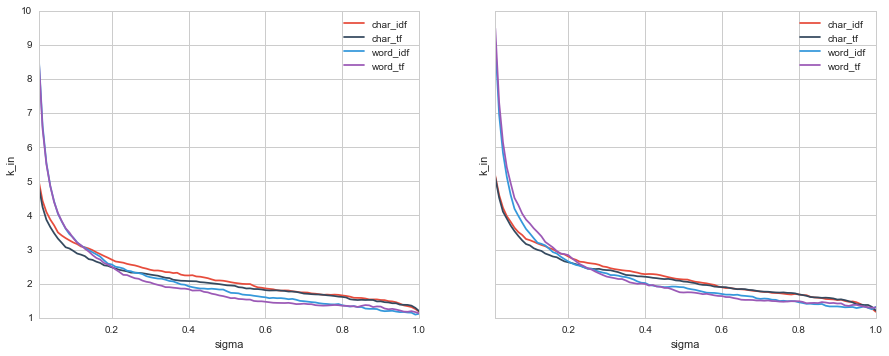

In [17]:
fig, (ax1, ax2) = sns.plt.subplots(ncols=2, sharey=True)

S_char_idf.k_in.plot(label="char_idf", ax=ax1)
S_char_tf.k_in.plot(label="char_tf", ax=ax1)
S_word_idf.k_in.plot(label="word_idf", ax=ax1)
S_word_tf.k_in.plot(label="word_tf", ax=ax1)
ax1.legend()
ax1.set_ylabel("k_in")

S_char_idf_m.k_in.plot(label="char_idf", ax=ax2)
S_char_tf_m.k_in.plot(label="char_tf", ax=ax2)
S_word_idf_m.k_in.plot(label="word_idf", ax=ax2)
S_word_tf_m.k_in.plot(label="word_tf", ax=ax2)
ax2.legend()
ax2.set_ylabel("k_in")

fig.set_figwidth(15)

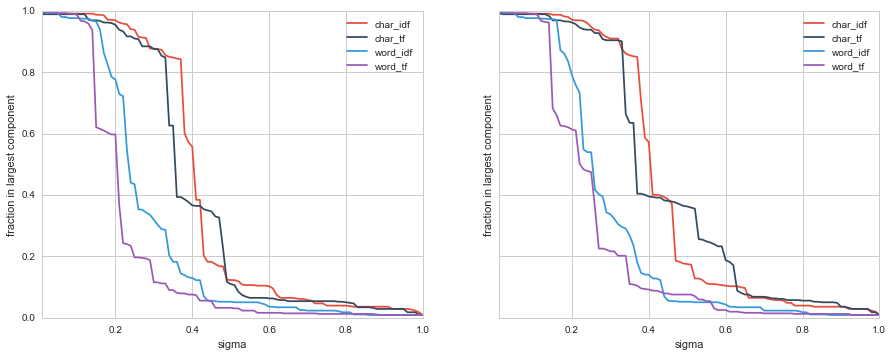

In [18]:
fig, (ax1, ax2) = sns.plt.subplots(ncols=2, sharey=True)

S_char_idf.comp_f.plot(label="char_idf", ax=ax1)
S_char_tf.comp_f.plot(label="char_tf", ax=ax1)
S_word_idf.comp_f.plot(label="word_idf", ax=ax1)
S_word_tf.comp_f.plot(label="word_tf", ax=ax1)
ax1.legend()
ax1.set_ylabel("fraction in largest component")

S_char_idf_m.comp_f.plot(label="char_idf", ax=ax2)
S_char_tf_m.comp_f.plot(label="char_tf", ax=ax2)
S_word_idf_m.comp_f.plot(label="word_idf", ax=ax2)
S_word_tf_m.comp_f.plot(label="word_tf", ax=ax2)
ax2.legend()
ax2.set_ylabel("fraction in largest component")

fig.set_figwidth(15)

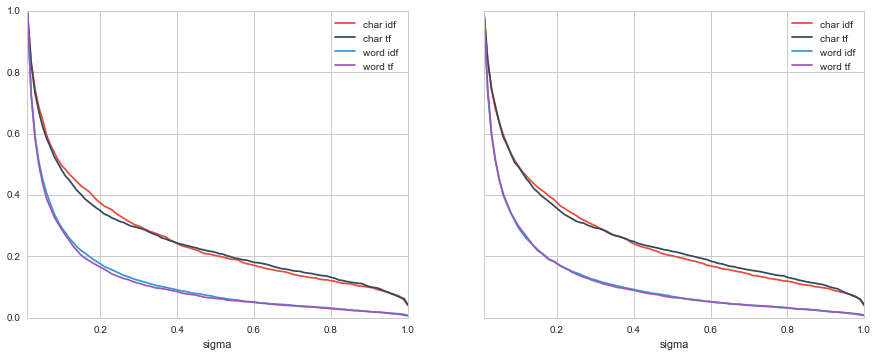

In [19]:
fig, (ax1, ax2) = sns.plt.subplots(ncols=2, sharey=True)

(S_char_idf.m / S_char_idf.m.max()).plot(label="char idf", ax=ax1)
(S_char_tf.m / S_char_tf.m.max()).plot(label="char tf", ax=ax1)
(S_word_idf.m / S_word_idf.m.max()).plot(label="word idf", ax=ax1)
(S_word_tf.m / S_word_tf.m.max()).plot(label="word tf", ax=ax1)
ax1.legend()

(S_char_idf_m.m / S_char_idf_m.m.max()).plot(label="char idf", ax=ax2)
(S_char_tf_m.m / S_char_tf_m.m.max()).plot(label="char tf", ax=ax2)
(S_word_idf_m.m / S_word_idf_m.m.max()).plot(label="word idf", ax=ax2)
(S_word_tf_m.m / S_word_tf_m.m.max()).plot(label="word tf", ax=ax2)
ax2.legend()

fig.set_figwidth(15)

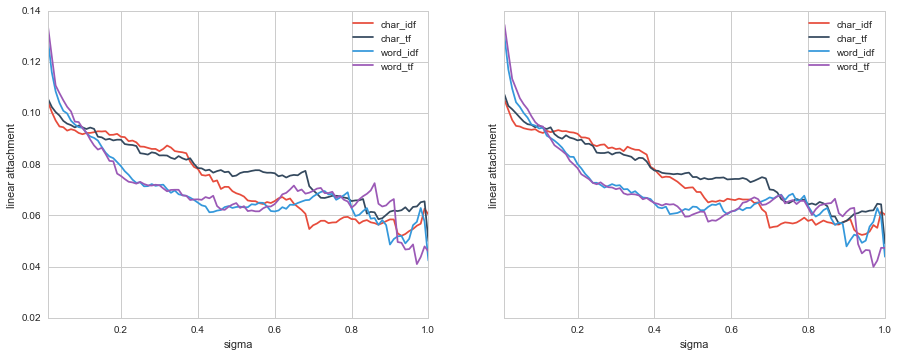

In [43]:
fig, (ax1, ax2) = sns.plt.subplots(ncols=2, sharey=True)

S_char_idf.la.plot(label="char_idf", ax=ax1)
S_char_tf.la.plot(label="char_tf", ax=ax1)
S_word_idf.la.plot(label="word_idf", ax=ax1)
S_word_tf.la.plot(label="word_tf", ax=ax1)
ax1.legend()
ax1.set_ylabel("linear attachment")

S_char_idf_m.la.plot(label="char_idf", ax=ax2)
S_char_tf_m.la.plot(label="char_tf", ax=ax2)
S_word_idf_m.la.plot(label="word_idf", ax=ax2)
S_word_tf_m.la.plot(label="word_tf", ax=ax2)
ax2.legend()
ax2.set_ylabel("linear attachment")

fig.set_figwidth(15)

### Evolving Graphs Statistics

In [20]:
gr = lambda x: x.year

E_char_idf = tn.statistics.evolving_graph_statistics(Y_char_idf, letter_dates, groupby=gr, sigma=0.3)
E_char_tf = tn.statistics.evolving_graph_statistics(Y_char_tf, letter_dates, groupby=gr, sigma=0.3)
E_word_idf = tn.statistics.evolving_graph_statistics(Y_word_idf, letter_dates, groupby=gr, sigma=0.3)
E_word_tf = tn.statistics.evolving_graph_statistics(Y_word_tf, letter_dates, groupby=gr, sigma=0.3)

E_char_idf_m = tn.statistics.evolving_graph_statistics(Y_char_idf_m, letter_dates, groupby=gr, sigma=0.3)
E_char_tf_m = tn.statistics.evolving_graph_statistics(Y_char_tf_m, letter_dates, groupby=gr, sigma=0.3)
E_word_idf_m = tn.statistics.evolving_graph_statistics(Y_word_idf_m, letter_dates, groupby=gr, sigma=0.3)
E_word_tf_m = tn.statistics.evolving_graph_statistics(Y_word_tf_m, letter_dates, groupby=gr, sigma=0.3)

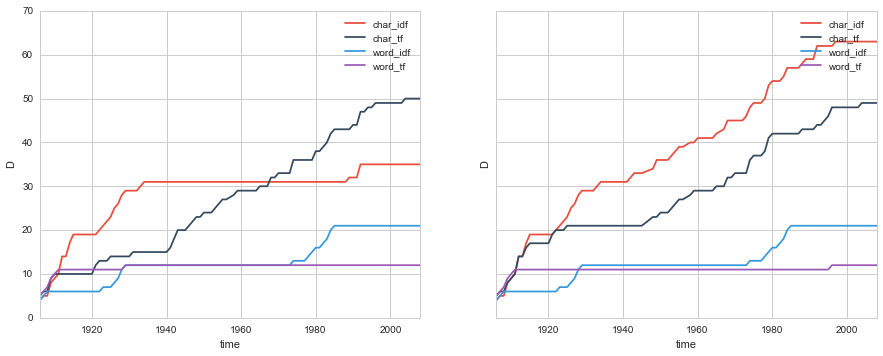

In [21]:
fig, (ax1, ax2) = sns.plt.subplots(ncols=2, sharey=True)

E_char_idf.D.plot(label="char_idf", ax=ax1)
E_char_tf.D.plot(label="char_tf", ax=ax1)
E_word_idf.D.plot(label="word_idf", ax=ax1)
E_word_tf.D.plot(label="word_tf", ax=ax1)
ax1.legend()
ax1.set_ylabel("D")

E_char_idf_m.D.plot(label="char_idf", ax=ax2)
E_char_tf_m.D.plot(label="char_tf", ax=ax2)
E_word_idf_m.D.plot(label="word_idf", ax=ax2)
E_word_tf_m.D.plot(label="word_tf", ax=ax2)
ax2.legend()
ax2.set_ylabel("D")

fig.set_figwidth(15)

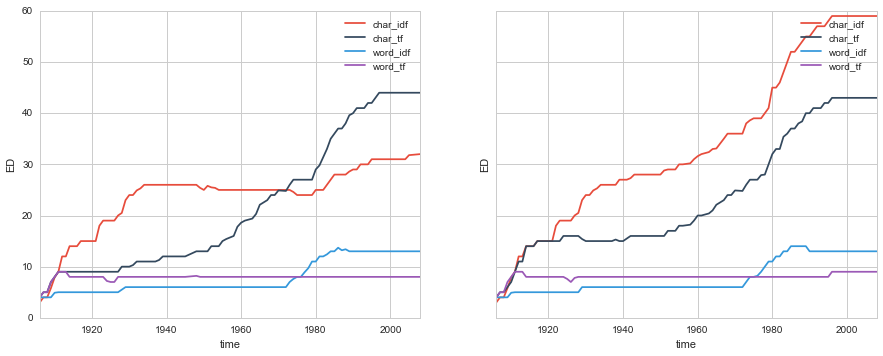

In [22]:
fig, (ax1, ax2) = sns.plt.subplots(ncols=2, sharey=True)

E_char_idf.ED.plot(label="char_idf", ax=ax1)
E_char_tf.ED.plot(label="char_tf", ax=ax1)
E_word_idf.ED.plot(label="word_idf", ax=ax1)
E_word_tf.ED.plot(label="word_tf", ax=ax1)
ax1.legend()
ax1.set_ylabel("ED")

E_char_idf_m.ED.plot(label="char_idf", ax=ax2)
E_char_tf_m.ED.plot(label="char_tf", ax=ax2)
E_word_idf_m.ED.plot(label="word_idf", ax=ax2)
E_word_tf_m.ED.plot(label="word_tf", ax=ax2)
ax2.legend()
ax2.set_ylabel("ED")

fig.set_figwidth(15)

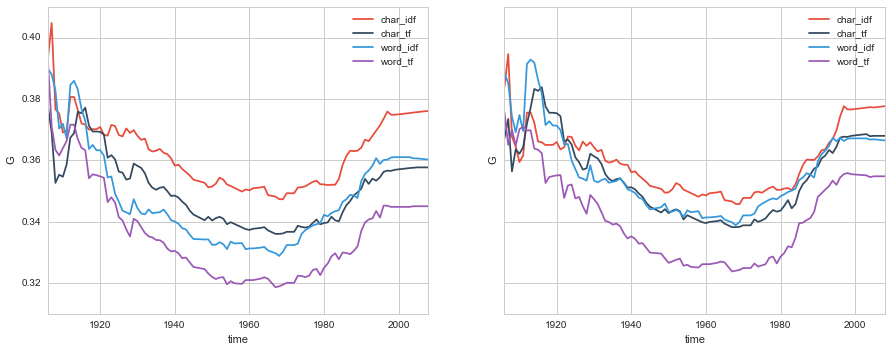

In [23]:
fig, (ax1, ax2) = sns.plt.subplots(ncols=2, sharey=True)

E_char_idf.gini_d.plot(label="char_idf", ax=ax1)
E_char_tf.gini_d.plot(label="char_tf", ax=ax1)
E_word_idf.gini_d.plot(label="word_idf", ax=ax1)
E_word_tf.gini_d.plot(label="word_tf", ax=ax1)
ax1.legend()
ax1.set_ylabel("G")

E_char_idf_m.gini_d.plot(label="char_idf", ax=ax2)
E_char_tf_m.gini_d.plot(label="char_tf", ax=ax2)
E_word_idf_m.gini_d.plot(label="word_idf", ax=ax2)
E_word_tf_m.gini_d.plot(label="word_tf", ax=ax2)
ax2.legend()
ax2.set_ylabel("G")

fig.set_figwidth(15)

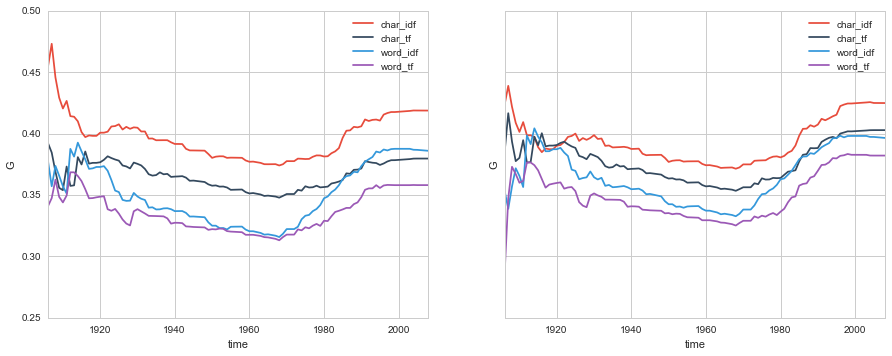

In [24]:
fig, (ax1, ax2) = sns.plt.subplots(ncols=2, sharey=True)

E_char_idf.gini_d_in.plot(label="char_idf", ax=ax1)
E_char_tf.gini_d_in.plot(label="char_tf", ax=ax1)
E_word_idf.gini_d_in.plot(label="word_idf", ax=ax1)
E_word_tf.gini_d_in.plot(label="word_tf", ax=ax1)
ax1.legend()
ax1.set_ylabel("G")

E_char_idf_m.gini_d_in.plot(label="char_idf", ax=ax2)
E_char_tf_m.gini_d_in.plot(label="char_tf", ax=ax2)
E_word_idf_m.gini_d_in.plot(label="word_idf", ax=ax2)
E_word_tf_m.gini_d_in.plot(label="word_tf", ax=ax2)
ax2.legend()
ax2.set_ylabel("G")

fig.set_figwidth(15)

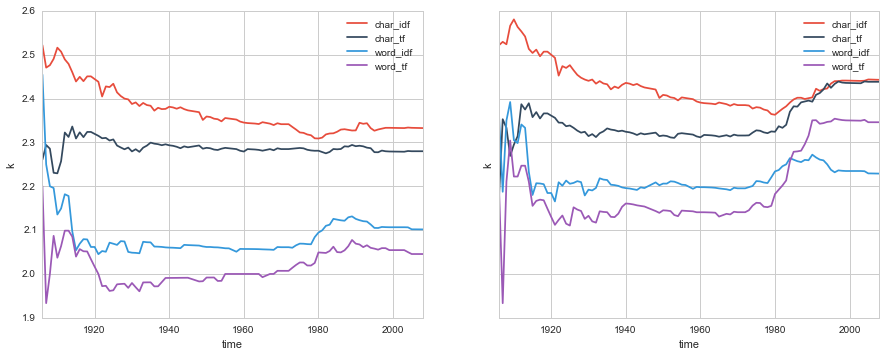

In [25]:
fig, (ax1, ax2) = sns.plt.subplots(ncols=2, sharey=True)

E_char_idf.k.plot(label="char_idf", ax=ax1)
E_char_tf.k.plot(label="char_tf", ax=ax1)
E_word_idf.k.plot(label="word_idf", ax=ax1)
E_word_tf.k.plot(label="word_tf", ax=ax1)
ax1.legend()
ax1.set_ylabel("k")

E_char_idf_m.k.plot(label="char_idf", ax=ax2)
E_char_tf_m.k.plot(label="char_tf", ax=ax2)
E_word_idf_m.k.plot(label="word_idf", ax=ax2)
E_word_tf_m.k.plot(label="word_tf", ax=ax2)
ax2.legend()
ax2.set_ylabel("k")

fig.set_figwidth(15)

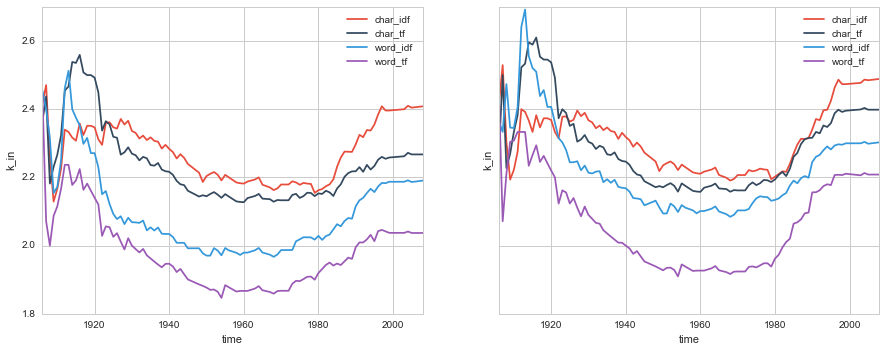

In [26]:
fig, (ax1, ax2) = sns.plt.subplots(ncols=2, sharey=True)

E_char_idf.k_in.plot(label="char_idf", ax=ax1)
E_char_tf.k_in.plot(label="char_tf", ax=ax1)
E_word_idf.k_in.plot(label="word_idf", ax=ax1)
E_word_tf.k_in.plot(label="word_tf", ax=ax1)
ax1.legend()
ax1.set_ylabel("k_in")

E_char_idf_m.k_in.plot(label="char_idf", ax=ax2)
E_char_tf_m.k_in.plot(label="char_tf", ax=ax2)
E_word_idf_m.k_in.plot(label="word_idf", ax=ax2)
E_word_tf_m.k_in.plot(label="word_tf", ax=ax2)
ax2.legend()
ax2.set_ylabel("k_in")

fig.set_figwidth(15)

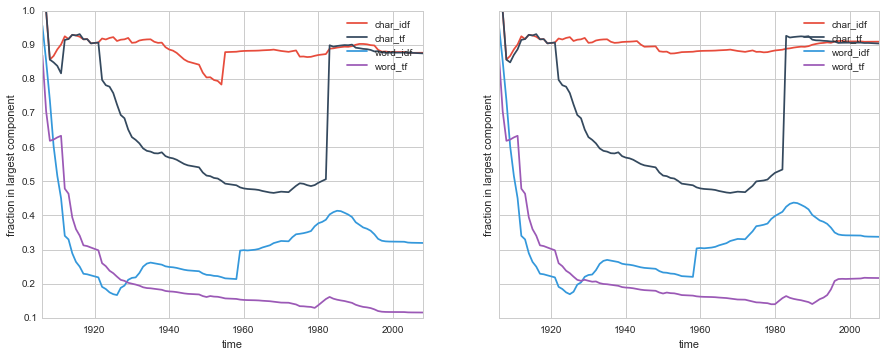

In [27]:
fig, (ax1, ax2) = sns.plt.subplots(ncols=2, sharey=True)

E_char_idf.comp_f.plot(label="char_idf", ax=ax1)
E_char_tf.comp_f.plot(label="char_tf", ax=ax1)
E_word_idf.comp_f.plot(label="word_idf", ax=ax1)
E_word_tf.comp_f.plot(label="word_tf", ax=ax1)
ax1.legend()
ax1.set_ylabel("fraction in largest component")

E_char_idf_m.comp_f.plot(label="char_idf", ax=ax2)
E_char_tf_m.comp_f.plot(label="char_tf", ax=ax2)
E_word_idf_m.comp_f.plot(label="word_idf", ax=ax2)
E_word_tf_m.comp_f.plot(label="word_tf", ax=ax2)
ax2.legend()
ax2.set_ylabel("fraction in largest component")

fig.set_figwidth(15)

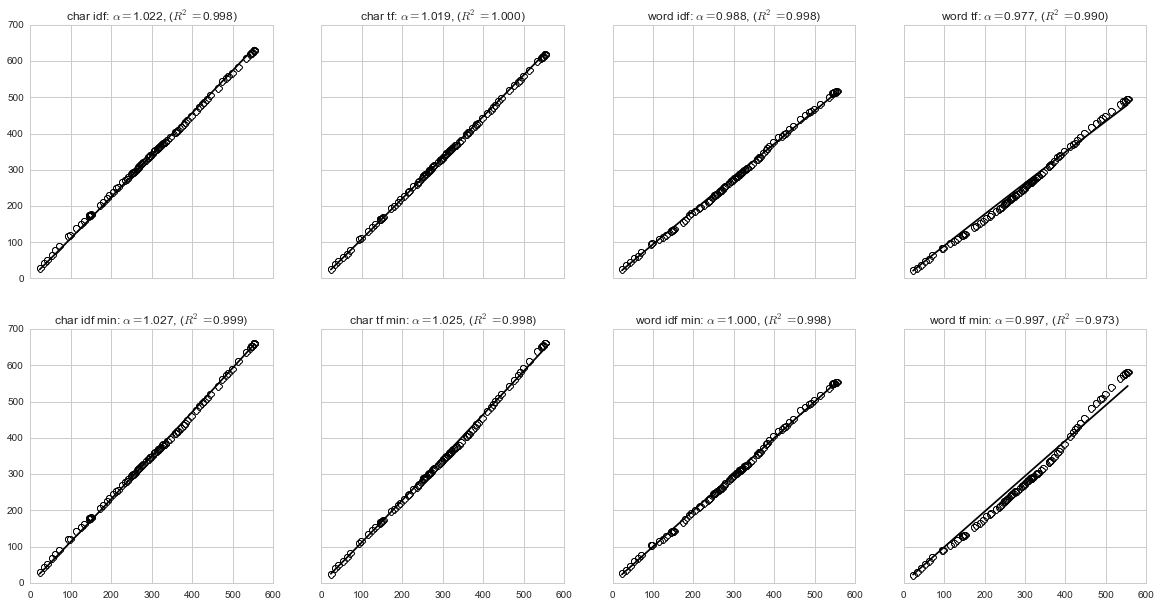

In [32]:
fig, ((a1, a2, a3, a4), (a5, a6, a7, a8)) = sns.plt.subplots(nrows=2, ncols=4, sharex=True, sharey=True)

R, alpha = tn.statistics.fit_densification(E_char_idf, ax=a1)
a1.set_title(r"char idf: $\alpha=$%.3f, ($R^2=$%.3f)" % (alpha, R))
R, alpha = tn.statistics.fit_densification(E_char_tf, ax=a2)
a2.set_title(r"char tf: $\alpha=$%.3f, ($R^2=$%.3f)" % (alpha, R))
R, alpha = tn.statistics.fit_densification(E_word_idf, ax=a3)
a3.set_title(r"word idf: $\alpha=$%.3f, ($R^2=$%.3f)" % (alpha, R))
R, alpha = tn.statistics.fit_densification(E_word_tf, ax=a4)
a4.set_title(r"word tf: $\alpha=$%.3f, ($R^2=$%.3f)" % (alpha, R))

R, alpha = tn.statistics.fit_densification(E_char_idf_m, ax=a5)
a5.set_title(r"char idf min: $\alpha=$%.3f, ($R^2=$%.3f)" % (alpha, R))
R, alpha = tn.statistics.fit_densification(E_char_tf_m, ax=a6)
a6.set_title(r"char tf min: $\alpha=$%.3f, ($R^2=$%.3f)" % (alpha, R))
R, alpha = tn.statistics.fit_densification(E_word_idf_m, ax=a7)
a7.set_title(r"word idf min: $\alpha=$%.3f, ($R^2=$%.3f)" % (alpha, R))
R, alpha = tn.statistics.fit_densification(E_word_tf_m, ax=a8)
a8.set_title(r"word tf min: $\alpha=$%.3f, ($R^2=$%.3f)" % (alpha, R))

fig.set_figwidth(20)
fig.set_figheight(10)

### Degree Distribution Analysis

In [33]:
def compare_dists(fit, dists=['power_law', 'lognormal', 'exponential']):
    combinations = [(dists[i], dists[i + 1]) for i in range(len(dists) - 1)]
    comparisons = [fit.distribution_compare(d1, d2) for d1, d2 in combinations]
    results = []
    for i, (ll, p_value) in enumerate(comparisons):
        winner, loser = (1, 0) if ll < 0 else (0, 1)
        winner, loser = combinations[i][winner], combinations[i][loser]
        yield "%s > %s (p=%.3f)" % (winner, loser, p_value)

In [34]:
models = [('char_idf', Y_char_idf), 
          ('char_tf', Y_char_tf), 
          ('word_idf', Y_word_idf),
          ('word_tf', Y_word_tf), 
          ('char_idf_m', Y_char_idf_m), 
          ('char_tf_m', Y_char_tf_m), 
          ('word_idf_m', Y_word_idf_m),
          ('word_tf_m', Y_word_tf_m)]

#### In-Degree

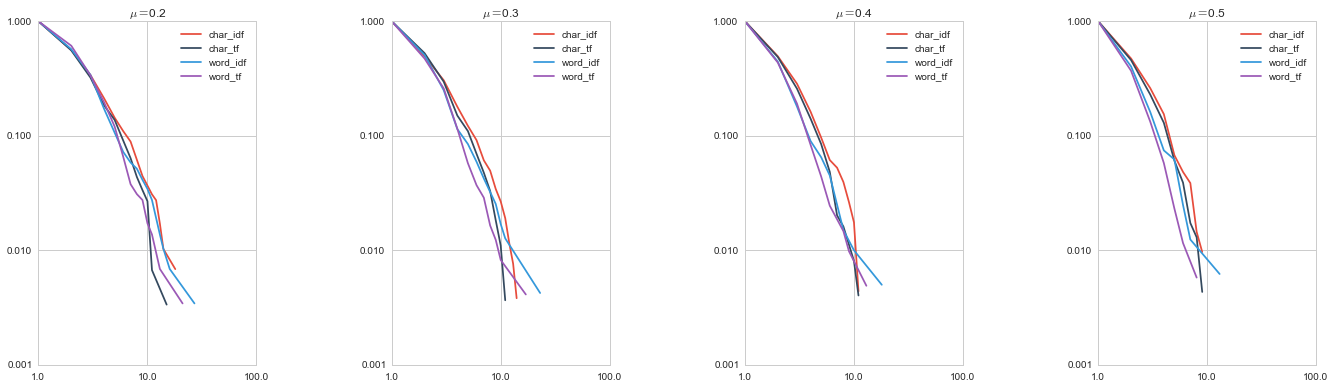

In [35]:
from matplotlib.ticker import ScalarFormatter

fig, axes = sns.plt.subplots(nrows=1, ncols=4, sharex=True)

for i, sigma in enumerate([0.2, 0.3, 0.4, 0.5]):
    for (model, Y) in models[:4]:
        G = tn.to_graph(Y, sigma=sigma)
        degree_in = list(v for v in G.in_degree().values() if v > 0)
        axes[i].loglog(*tn.statistics.ccdf(degree_in), label=model)
      
    axes[i].yaxis.set_major_formatter(ScalarFormatter())
    axes[i].xaxis.set_major_formatter(ScalarFormatter())
    axes[i].legend()
    axes[i].set_title(r'$\mu=$%.1f' % sigma)

fig.tight_layout()
fig.set_figwidth(20)

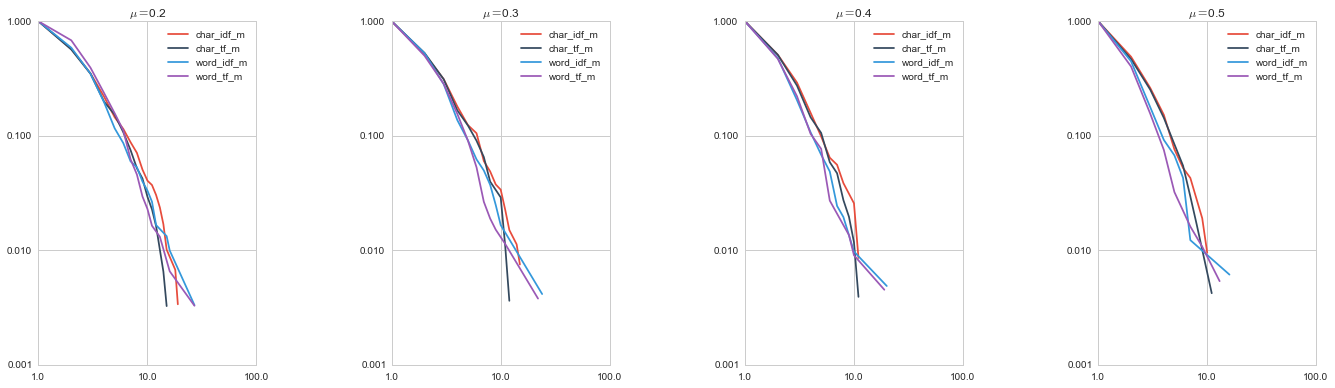

In [36]:
fig, axes = sns.plt.subplots(nrows=1, ncols=4, sharex=True)

for i, sigma in enumerate([0.2, 0.3, 0.4, 0.5]):
    for (model, Y) in models[4:]:
        G = tn.to_graph(Y, sigma=sigma)
        degree_in = list(v for v in G.in_degree().values() if v > 0) # include unconnected nodes or not?
        axes[i].loglog(*tn.statistics.ccdf(degree_in), label=model)
      
    axes[i].yaxis.set_major_formatter(ScalarFormatter())
    axes[i].xaxis.set_major_formatter(ScalarFormatter())
    axes[i].legend()
    axes[i].set_title(r'$\mu=$%.1f' % sigma)

fig.tight_layout()
fig.set_figwidth(20)

In [ ]:
fits = []
for i, sigma in enumerate([0.2, 0.3, 0.4, 0.5]):
    for (model, Y) in models:
        G = tn.to_graph(Y, sigma=sigma)
        degree_in = list(v + 1 for v in G.in_degree().values())    
        fit = pl.Fit(degree_in, discrete=True)
        fits.append({'model': model, 'sigma': sigma, 
                     'x_min': fit.xmin, 'alpha': fit.alpha, 
                     'comparisons': ' '.join(compare_dists(fit))})
fit_df = pd.DataFrame(fits)

In [38]:
fit_df

,alpha,comparisons,model,sigma,x_min
0,2.724507,lognormal > power_law (p=0.049) lognormal > ex...,char_idf,0.2,3
1,2.883387,lognormal > power_law (p=0.020) lognormal > ex...,char_tf,0.2,3
2,3.204551,lognormal > power_law (p=0.625) lognormal > ex...,word_idf,0.2,5
3,3.445596,lognormal > power_law (p=0.373) lognormal > ex...,word_tf,0.2,4
4,2.952253,lognormal > power_law (p=0.195) lognormal > ex...,char_idf_m,0.2,4
5,2.361646,lognormal > power_law (p=0.000) lognormal > ex...,char_tf_m,0.2,2
6,3.248939,lognormal > power_law (p=0.678) lognormal > ex...,word_idf_m,0.2,4
7,3.229526,lognormal > power_law (p=0.309) lognormal > ex...,word_tf_m,0.2,4
8,3.169218,lognormal > power_law (p=0.178) lognormal > ex...,char_idf,0.3,4
9,14.240858,lognormal > power_law (p=0.373) lognormal > ex...,char_tf,0.3,11


#### Degree

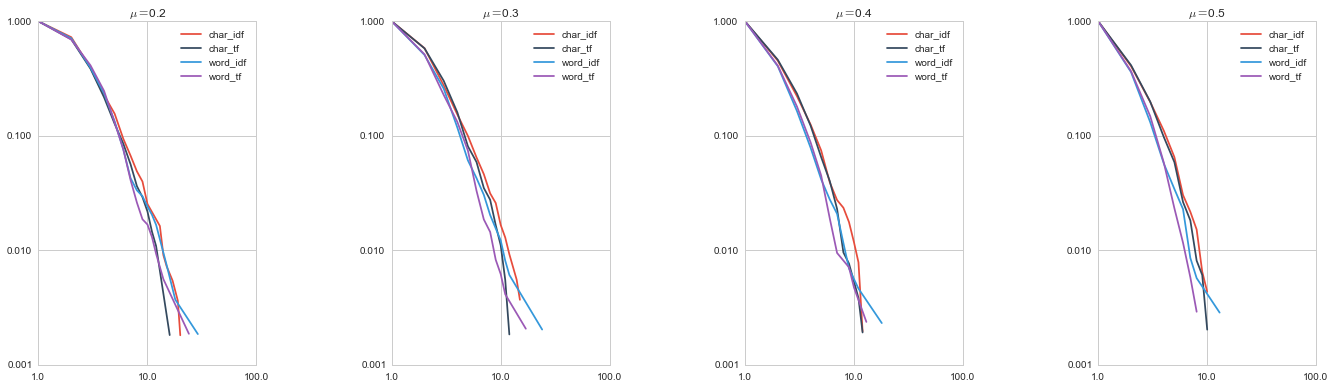

In [39]:
fig, axes = sns.plt.subplots(nrows=1, ncols=4, sharex=True)

for i, sigma in enumerate([0.2, 0.3, 0.4, 0.5]):
    for (model, Y) in models[:4]:
        G = tn.to_graph(Y, sigma=sigma)
        degree_in = list(v for v in G.degree().values() if v > 0)
        axes[i].loglog(*tn.statistics.ccdf(degree_in), label=model)
      
    axes[i].yaxis.set_major_formatter(ScalarFormatter())
    axes[i].xaxis.set_major_formatter(ScalarFormatter())
    axes[i].legend()
    axes[i].set_title(r'$\mu=$%.1f' % sigma)

fig.tight_layout()
fig.set_figwidth(20)

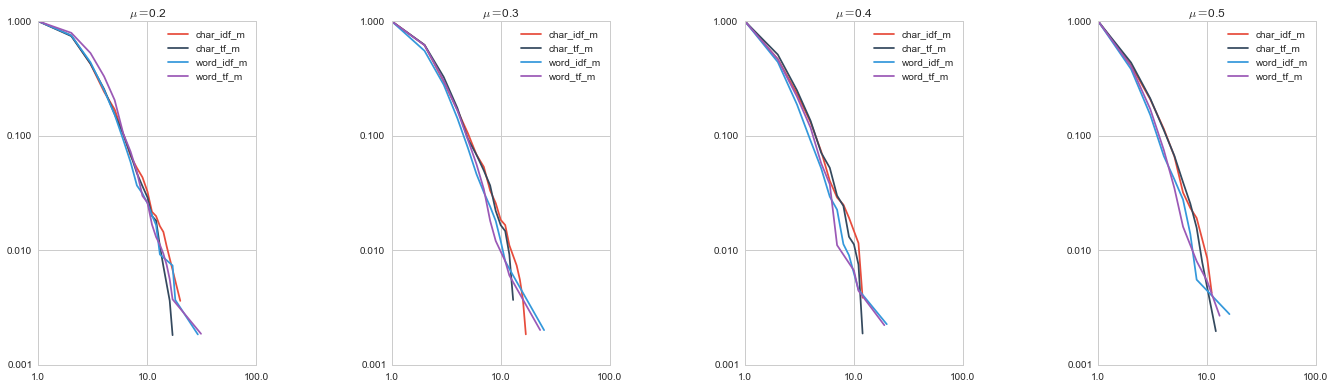

In [40]:
fig, axes = sns.plt.subplots(nrows=1, ncols=4, sharex=True)

for i, sigma in enumerate([0.2, 0.3, 0.4, 0.5]):
    for (model, Y) in models[4:]:
        G = tn.to_graph(Y, sigma=sigma)
        degree_in = list(v for v in G.degree().values() if v > 0) # include unconnected nodes or not?
        axes[i].loglog(*tn.statistics.ccdf(degree_in), label=model)
      
    axes[i].yaxis.set_major_formatter(ScalarFormatter())
    axes[i].xaxis.set_major_formatter(ScalarFormatter())
    axes[i].legend()
    axes[i].set_title(r'$\mu=$%.1f' % sigma)

fig.tight_layout()
fig.set_figwidth(20)

In [ ]:
fits = []
for i, sigma in enumerate([0.2, 0.3, 0.4, 0.5]):
    for (model, Y) in models:
        G = tn.to_graph(Y, sigma=sigma)
        degree_in = list(v for v in G.degree().values() if v > 0)    
        fit = pl.Fit(degree_in, discrete=True)
        fits.append({'model': model, 'sigma': sigma, 
                     'x_min': fit.xmin, 'alpha': fit.alpha, 
                     'comparisons': ' '.join(compare_dists(fit))})
fit_df = pd.DataFrame(fits)

In [42]:
fit_df

,alpha,comparisons,model,sigma,x_min
0,3.417500,lognormal > power_law (p=0.366) lognormal > ex...,char_idf,0.2,5
1,2.940577,lognormal > power_law (p=0.015) lognormal > ex...,char_tf,0.2,3
2,3.371302,lognormal > power_law (p=0.650) lognormal > ex...,word_idf,0.2,4
3,3.628860,lognormal > power_law (p=0.533) lognormal > ex...,word_tf,0.2,4
4,3.399108,lognormal > power_law (p=0.412) lognormal > ex...,char_idf_m,0.2,5
5,3.183294,lognormal > power_law (p=0.087) lognormal > ex...,char_tf_m,0.2,4
6,3.527572,lognormal > power_law (p=0.748) lognormal > ex...,word_idf_m,0.2,5
7,3.947650,lognormal > power_law (p=0.894) lognormal > ex...,word_tf_m,0.2,7
8,2.864873,lognormal > power_law (p=0.055) lognormal > ex...,char_idf,0.3,3
9,14.240858,lognormal > power_law (p=0.373) lognormal > ex...,char_tf,0.3,11
